In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import os
import shutil
import random
import yaml

In [ ]:
# Unzip images to a custom data folder
!unzip -q /content/candy_data.zip -d /content/custom_data

In [ ]:
# Create output directories
train_img_dir = "/content/data/train_data/images"
train_lbl_dir = "/content/data/train_data/labels"
val_img_dir = "/content/data/val_data/images"
val_lbl_dir = "/content/data/val_data/labels"
test_img_dir = "/content/data/test_data/images"
test_lbl_dir = "/content/data/test_data/labels"

# Define the source directories where the unzipped data is located
image_dir = "/content/custom_data/images"
label_dir = "/content/custom_data/labels"

for path in [train_img_dir, train_lbl_dir, val_img_dir, val_lbl_dir, test_img_dir, test_lbl_dir]:
    os.makedirs(path, exist_ok=True)

# Get and shuffle image files
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(image_files)

# Perform 80-10-10 split
total = len(image_files)
train_end = int(0.8 * total)
val_end = train_end + int(0.1 * total)

train_files = image_files[:train_end]
val_files = image_files[train_end:val_end]
test_files = image_files[val_end:]

# Function to copy images and labels
def copy_pair(file_list, src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
    for img_file in file_list:
        lbl_file = os.path.splitext(img_file)[0] + ".txt"
        shutil.copy(os.path.join(src_img_dir, img_file), os.path.join(dst_img_dir, img_file))
        lbl_path = os.path.join(src_lbl_dir, lbl_file)
        if os.path.exists(lbl_path):
            shutil.copy(lbl_path, os.path.join(dst_lbl_dir, lbl_file))
        else:
            print(f" Missing label for {img_file}, skipping label.")

# Perform copy operations
copy_pair(train_files, image_dir, label_dir, train_img_dir, train_lbl_dir)
copy_pair(val_files, image_dir, label_dir, val_img_dir, val_lbl_dir)
copy_pair(test_files, image_dir, label_dir, test_img_dir, test_lbl_dir)

print(f" Done: {len(train_files)} train, {len(val_files)} val, {len(test_files)} test images.")

 Done: 129 train, 16 val, 17 test images.


In [ ]:

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data/',
      'train': 'train_data/images',
      'val': 'val_data/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data/
train: train_data/images
val: val_data/images
nc: 11
names:
- MMs_peanut
- MMs_regular
- airheads
- gummy_worms
- milky_way
- nerds
- skittles
- snickers
- starbust
- three_musketeers
- twizzlers


In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 95.6MB/s]
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, 

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/data/test_data/images save=True


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,417,057 parameters, 0 gradients, 21.3 GFLOPs

image 1/17 /content/data/test_data/images/119de4cd-candy_2.jpg: 384x640 2 MMs_peanuts, 3 airheadss, 49.3ms
image 2/17 /content/data/test_data/images/2ef53e19-candy_82.jpg: 480x640 1 airheads, 1 nerds, 1 snickers, 1 starbust, 1 three_musketeers, 50.2ms
image 3/17 /content/data/test_data/images/3fa5ff26-candy_27.jpg: 384x640 1 MMs_regular, 1 gummy_worms, 2 skittless, 1 snickers, 1 twizzlers, 11.5ms
image 4/17 /content/data/test_data/images/459c5d1e-candy_25.jpg: 384x640 1 gummy_worms, 1 skittles, 10.9ms
image 5/17 /content/data/test_data/images/5ef4b55b-candy_80.jpg: 480x640 1 gummy_worms, 1 milky_way, 1 skittles, 1 twizzlers, 13.2ms
image 6/17 /content/data/test_data/images/66628b3d-candy_146.jpg: 384x640 1 airheads, 13.3ms
image 7/17 /content/data/test_data/images/6d15070c-candy_75.jpg: 480x640 2 MMs_regulars, 1 skittles

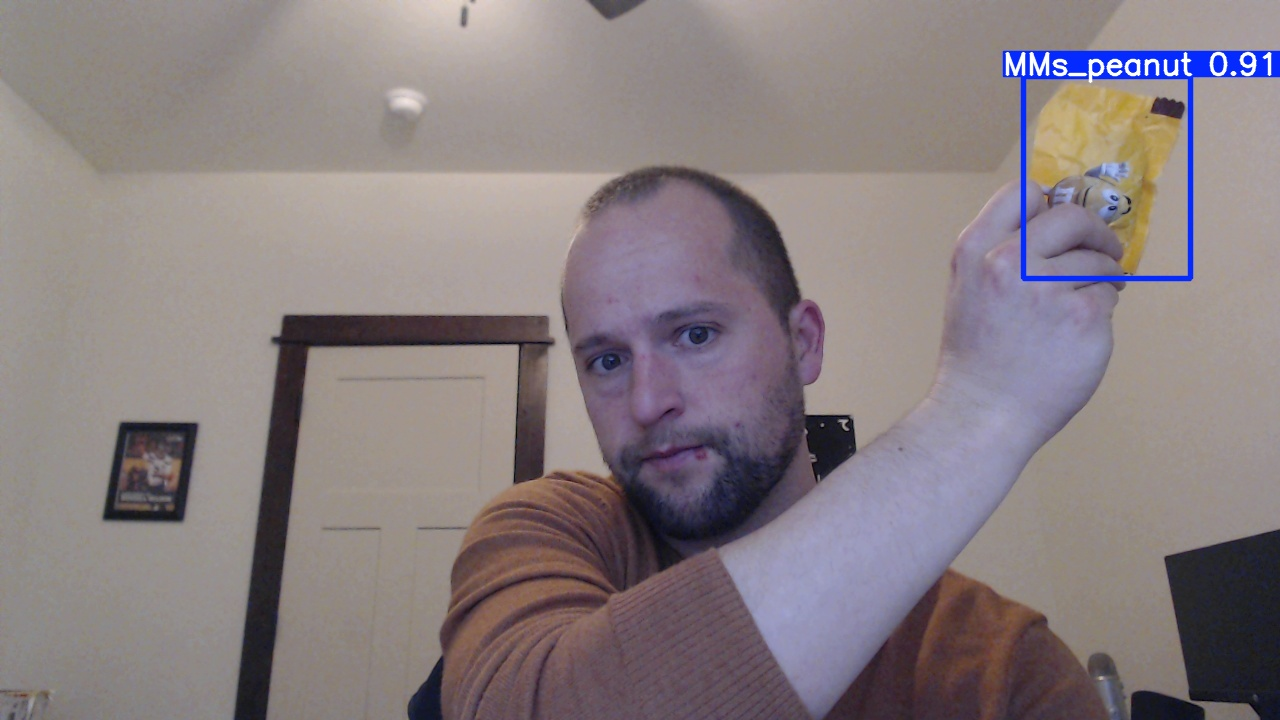

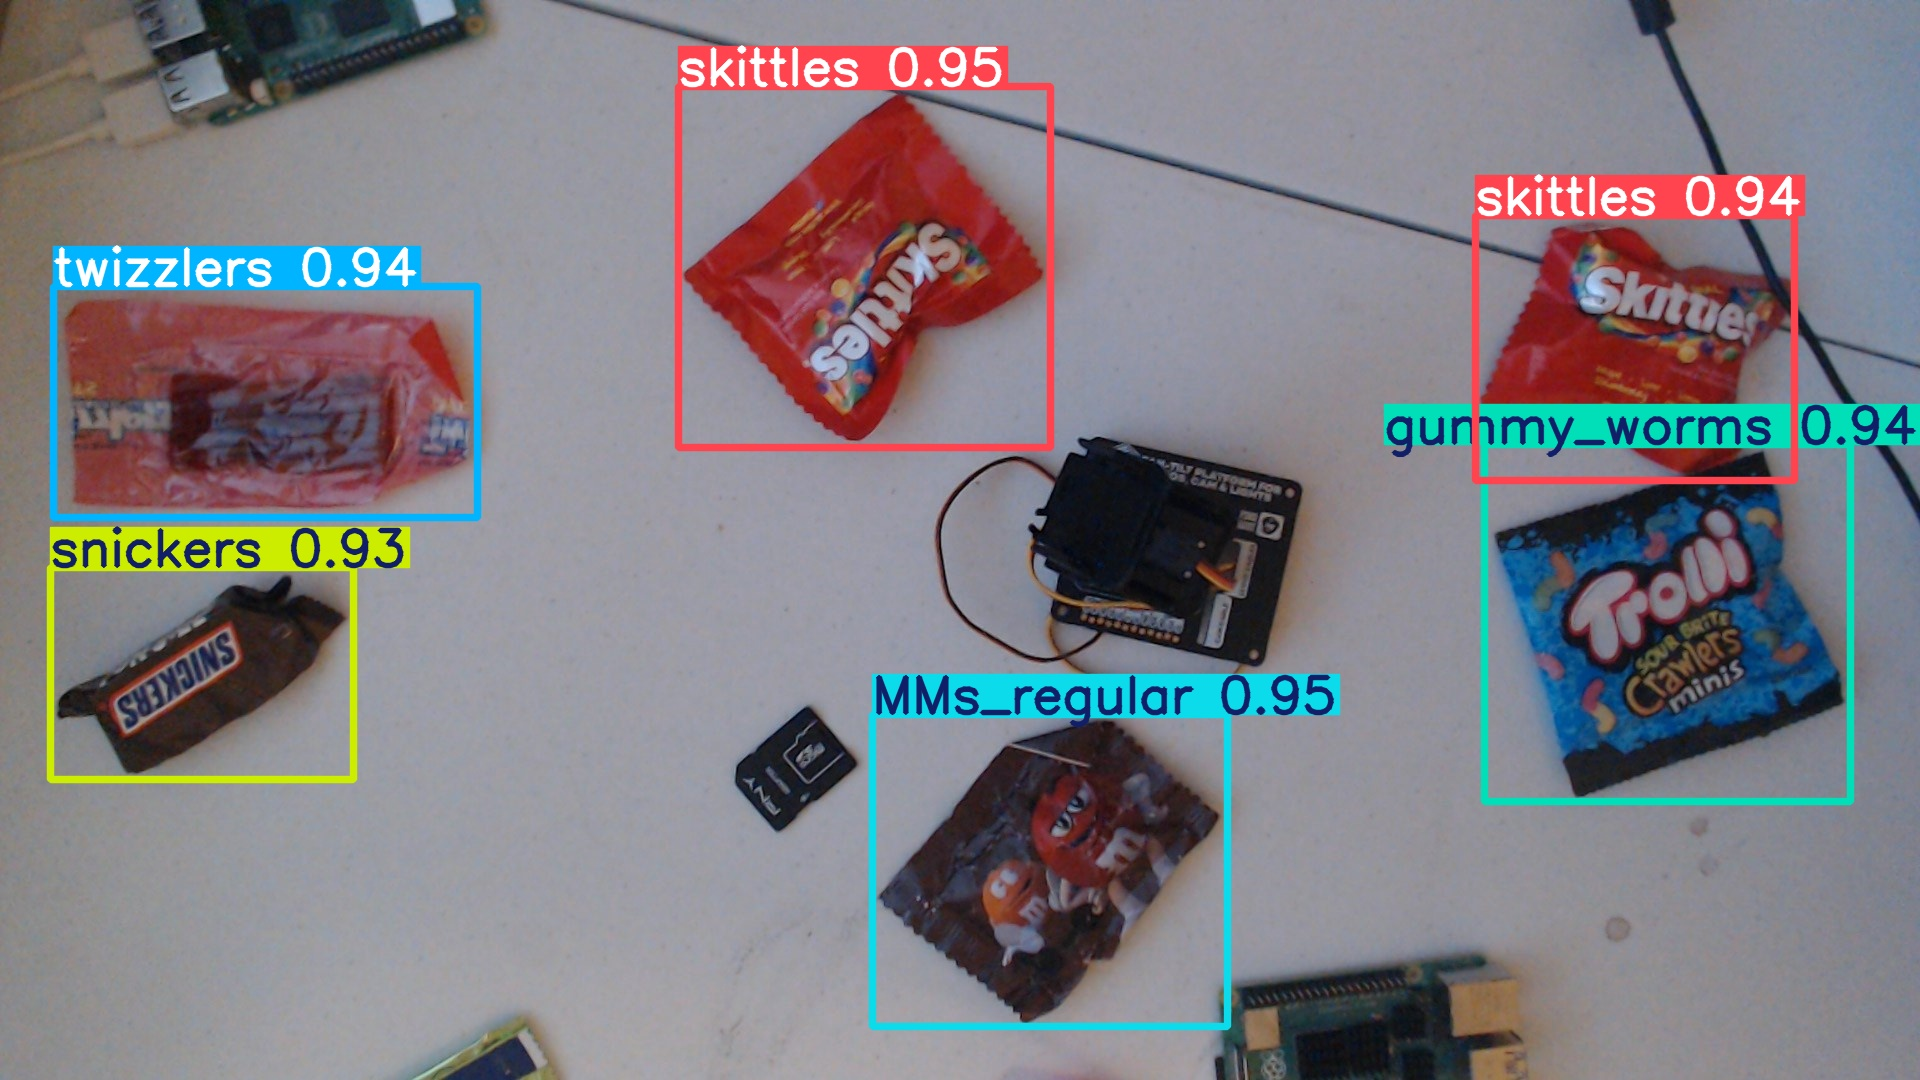

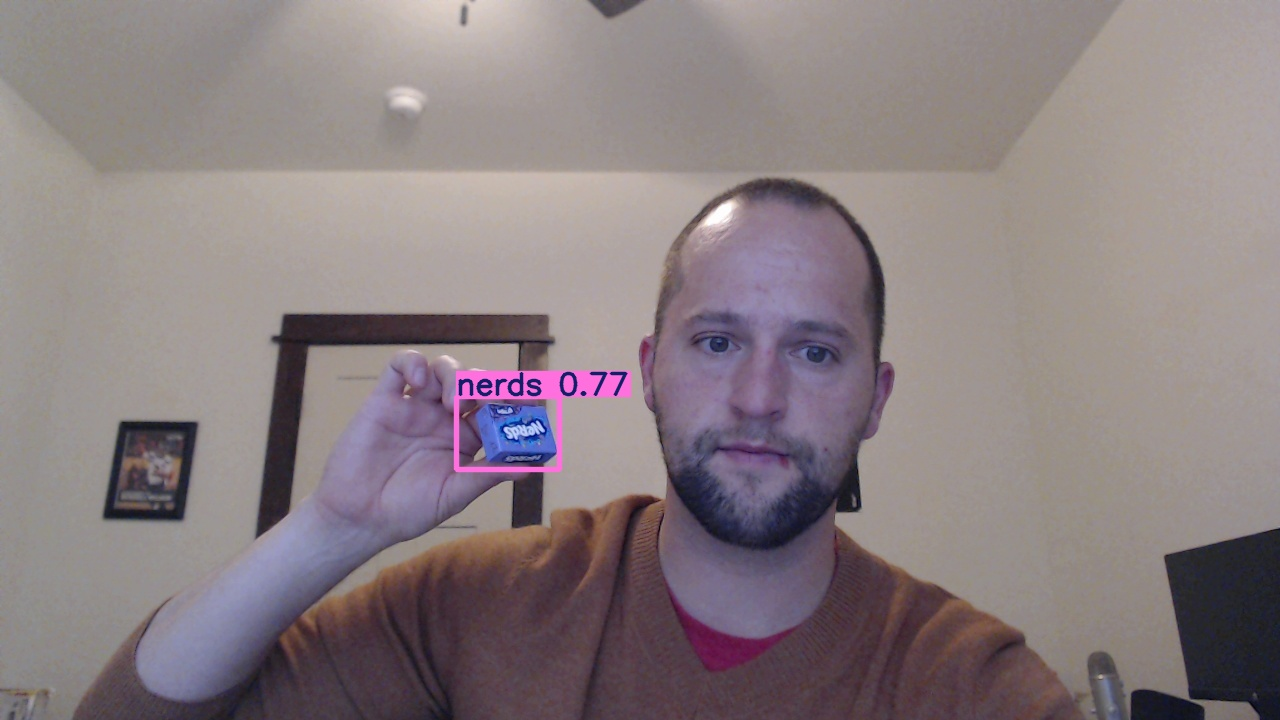

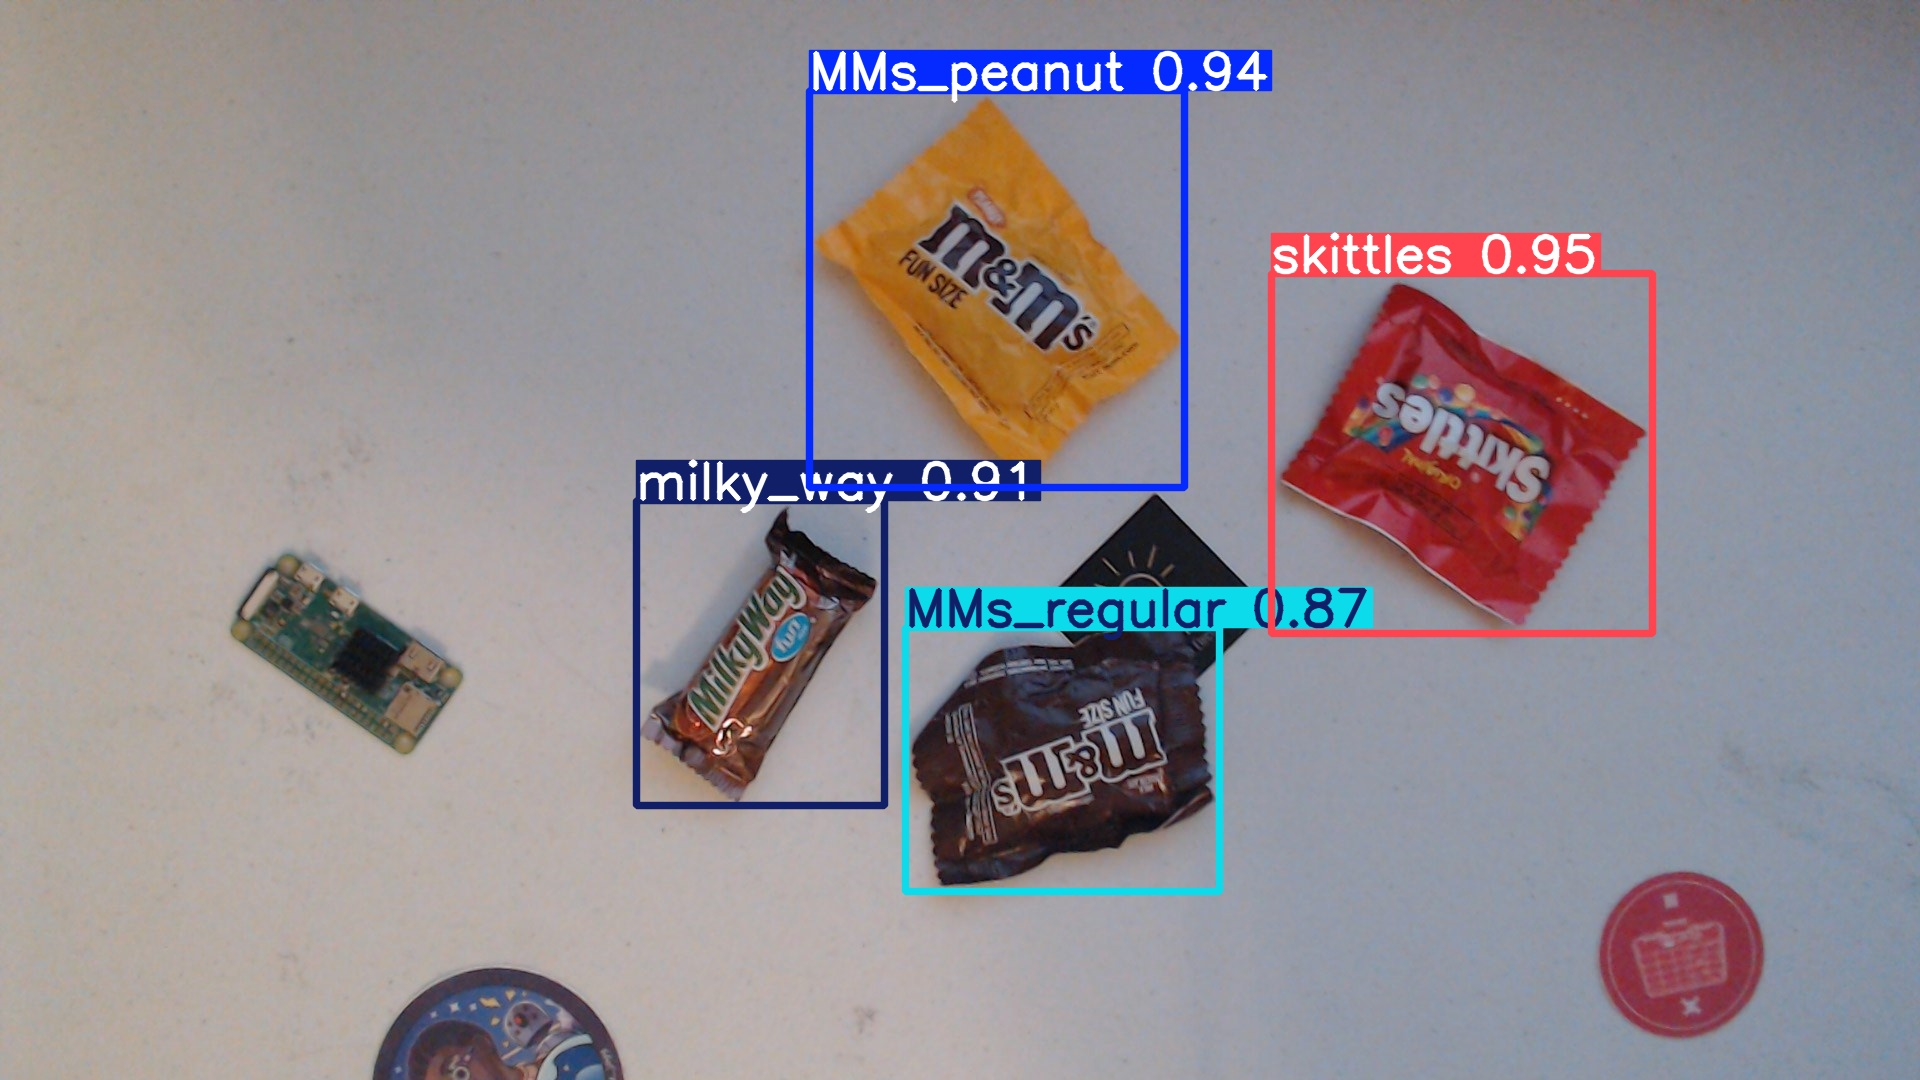

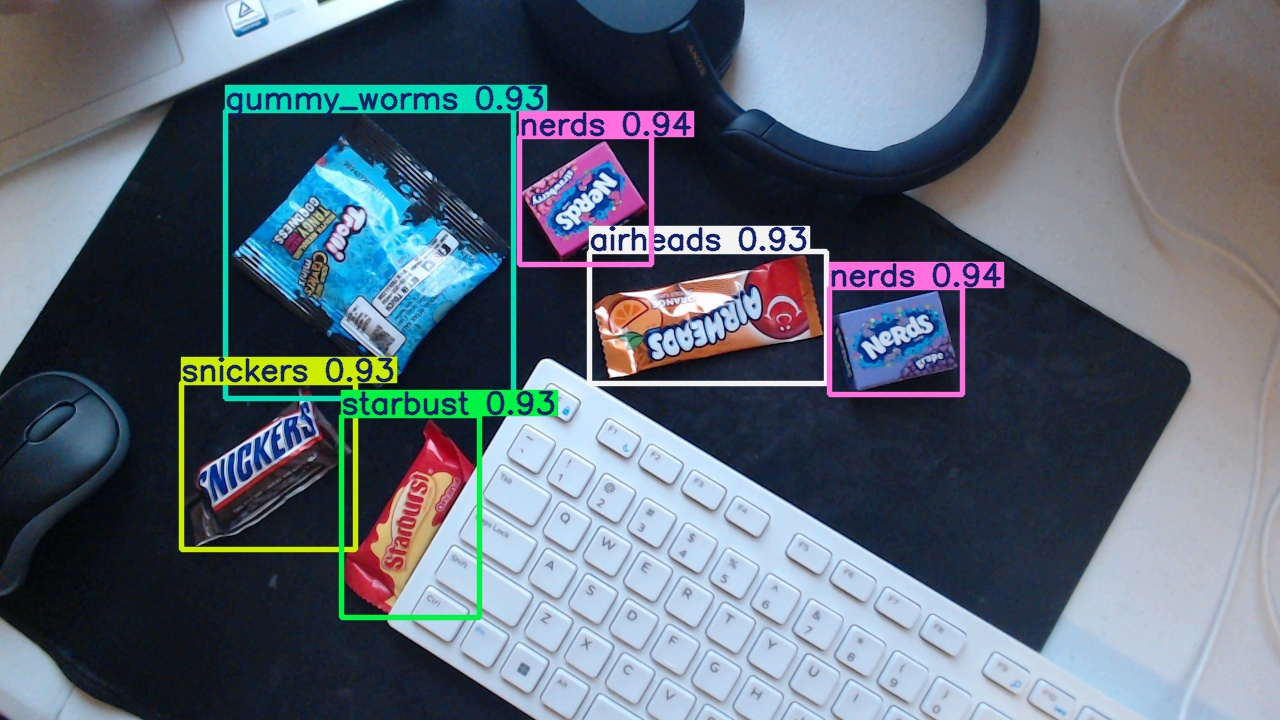

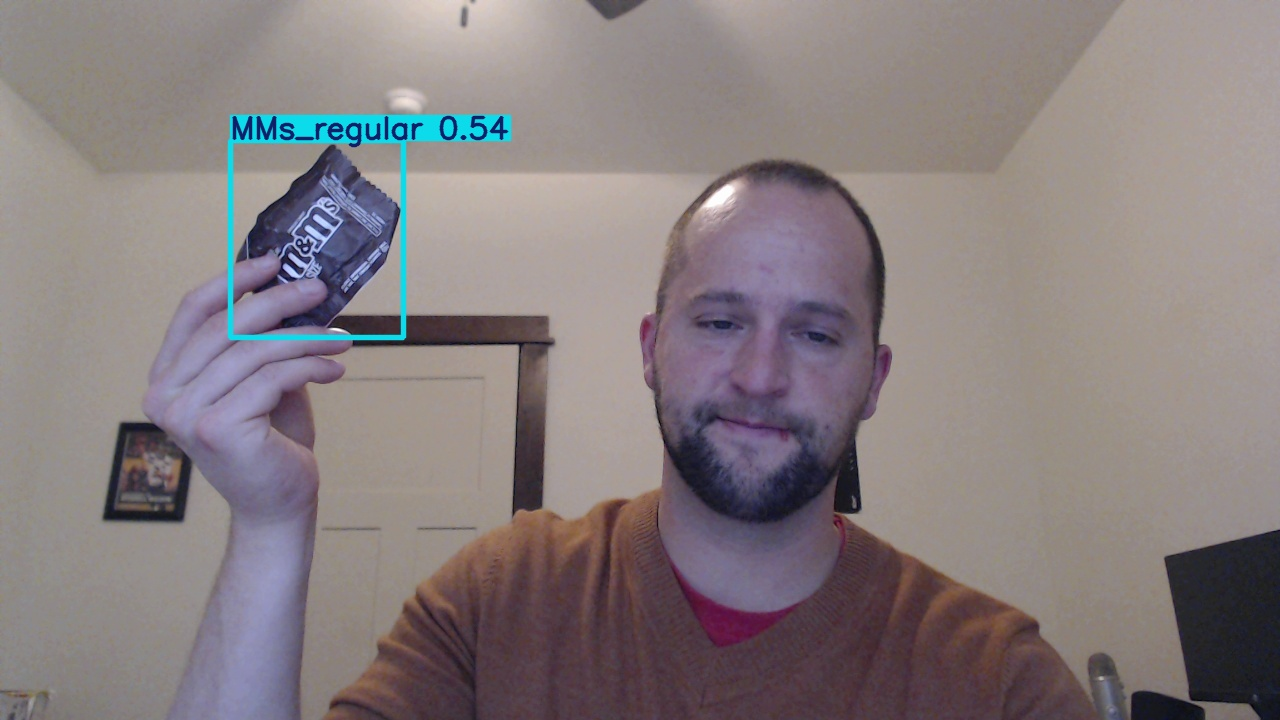

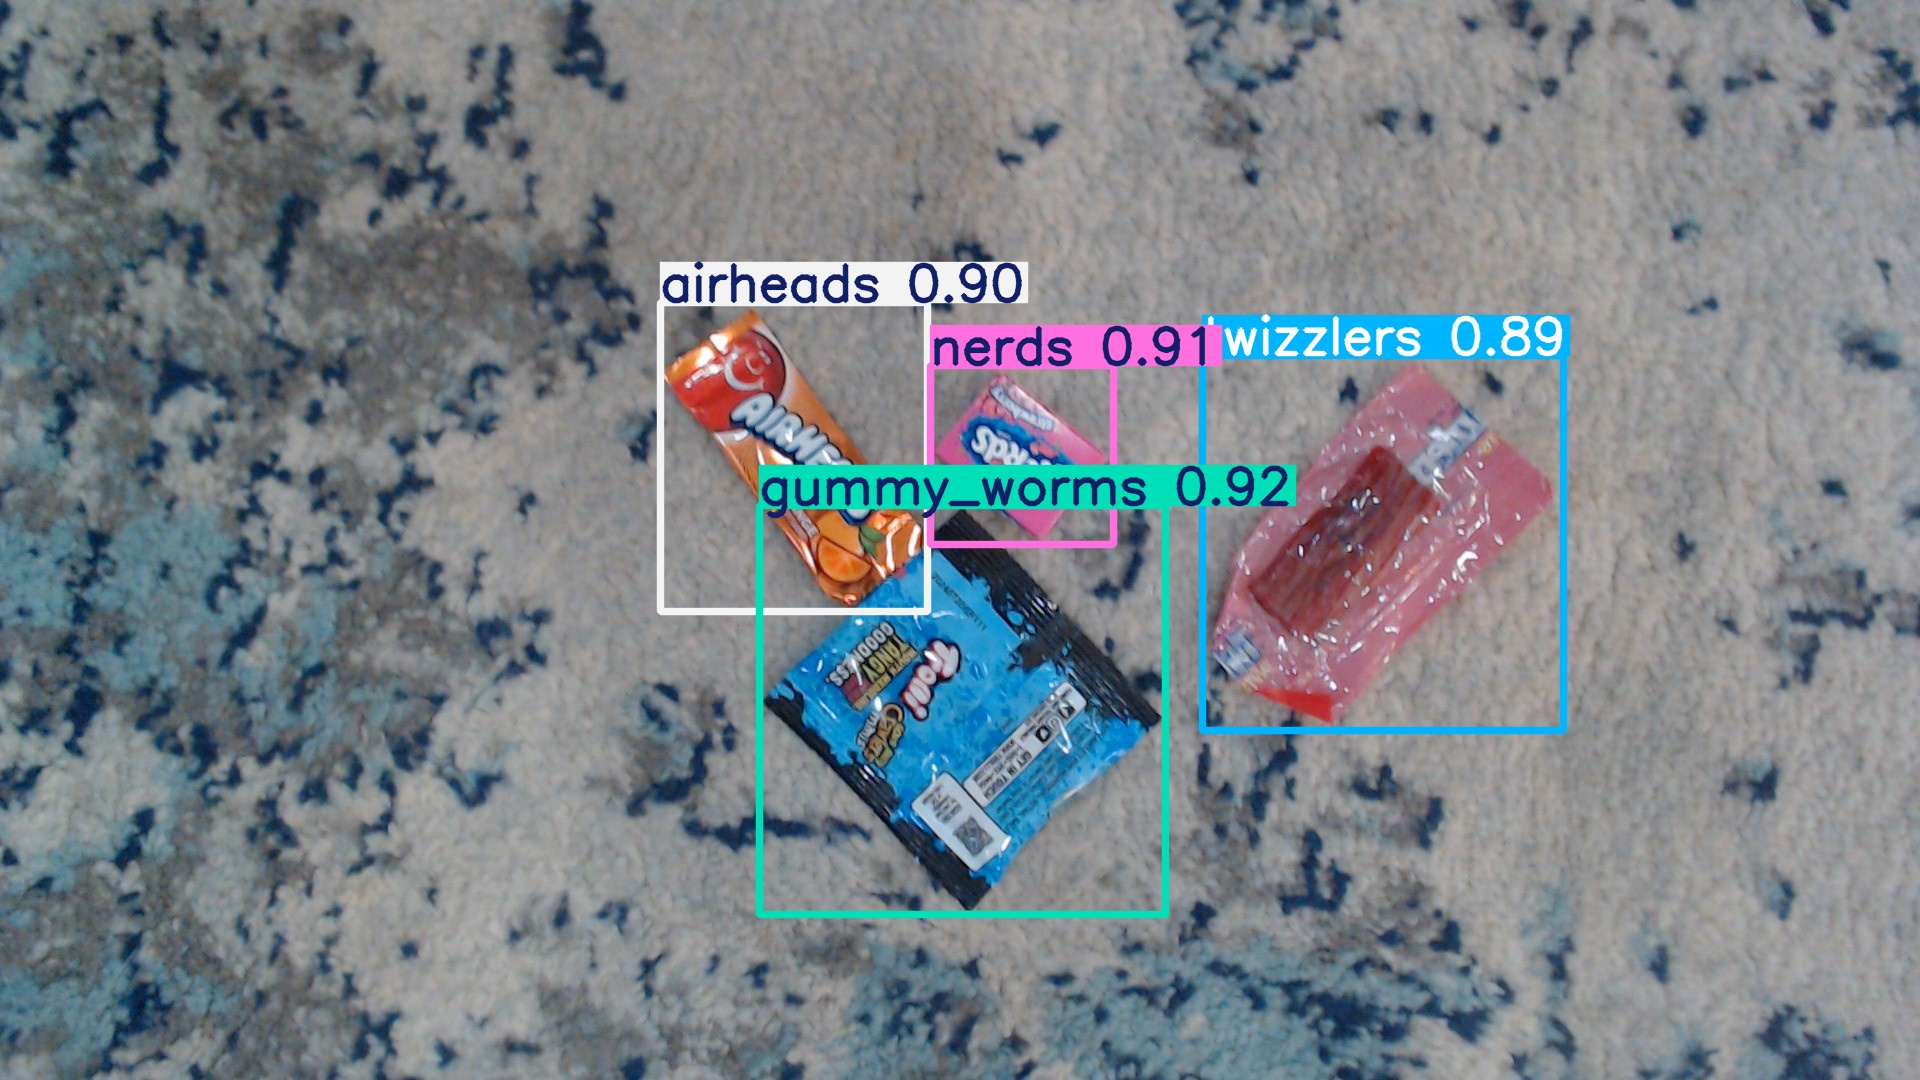

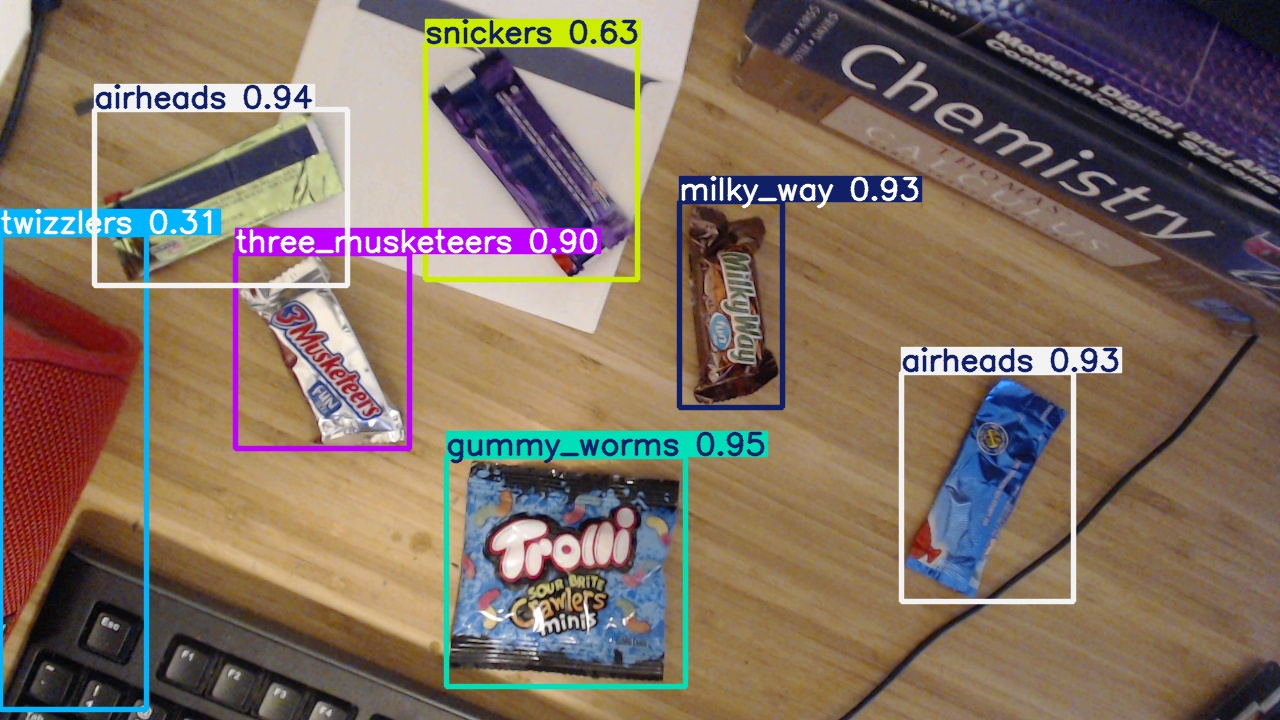

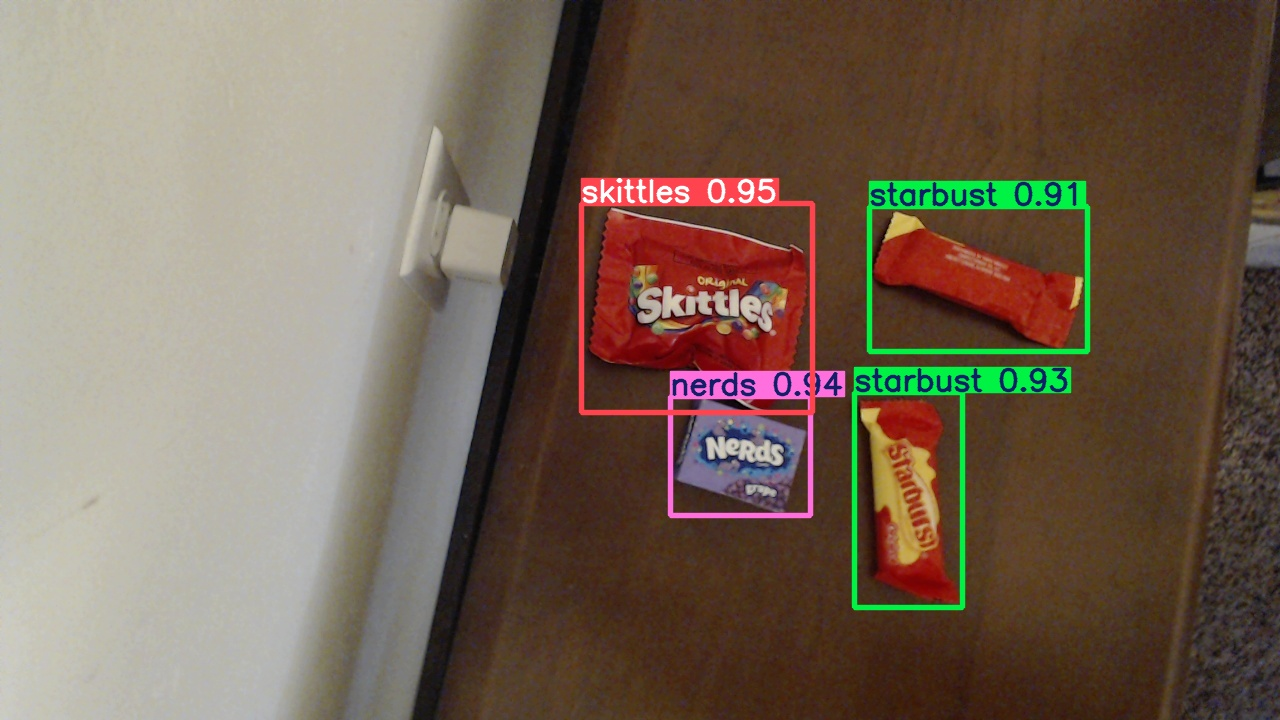

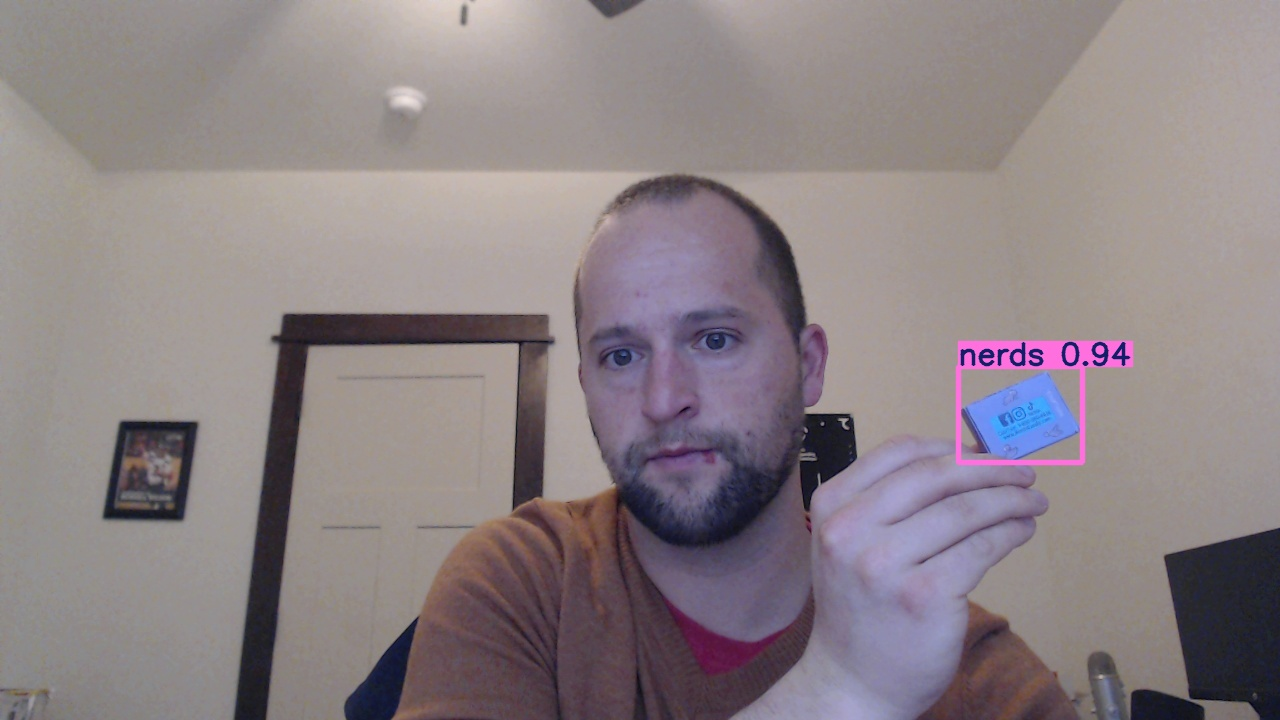

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


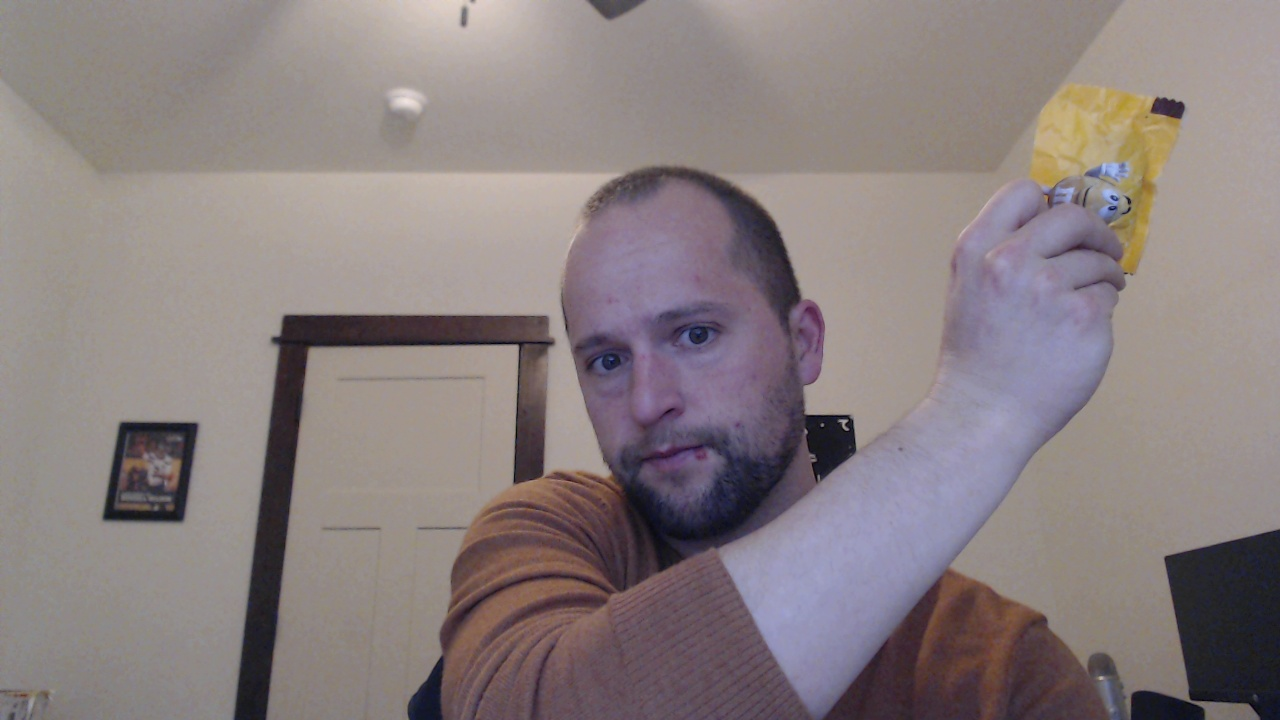

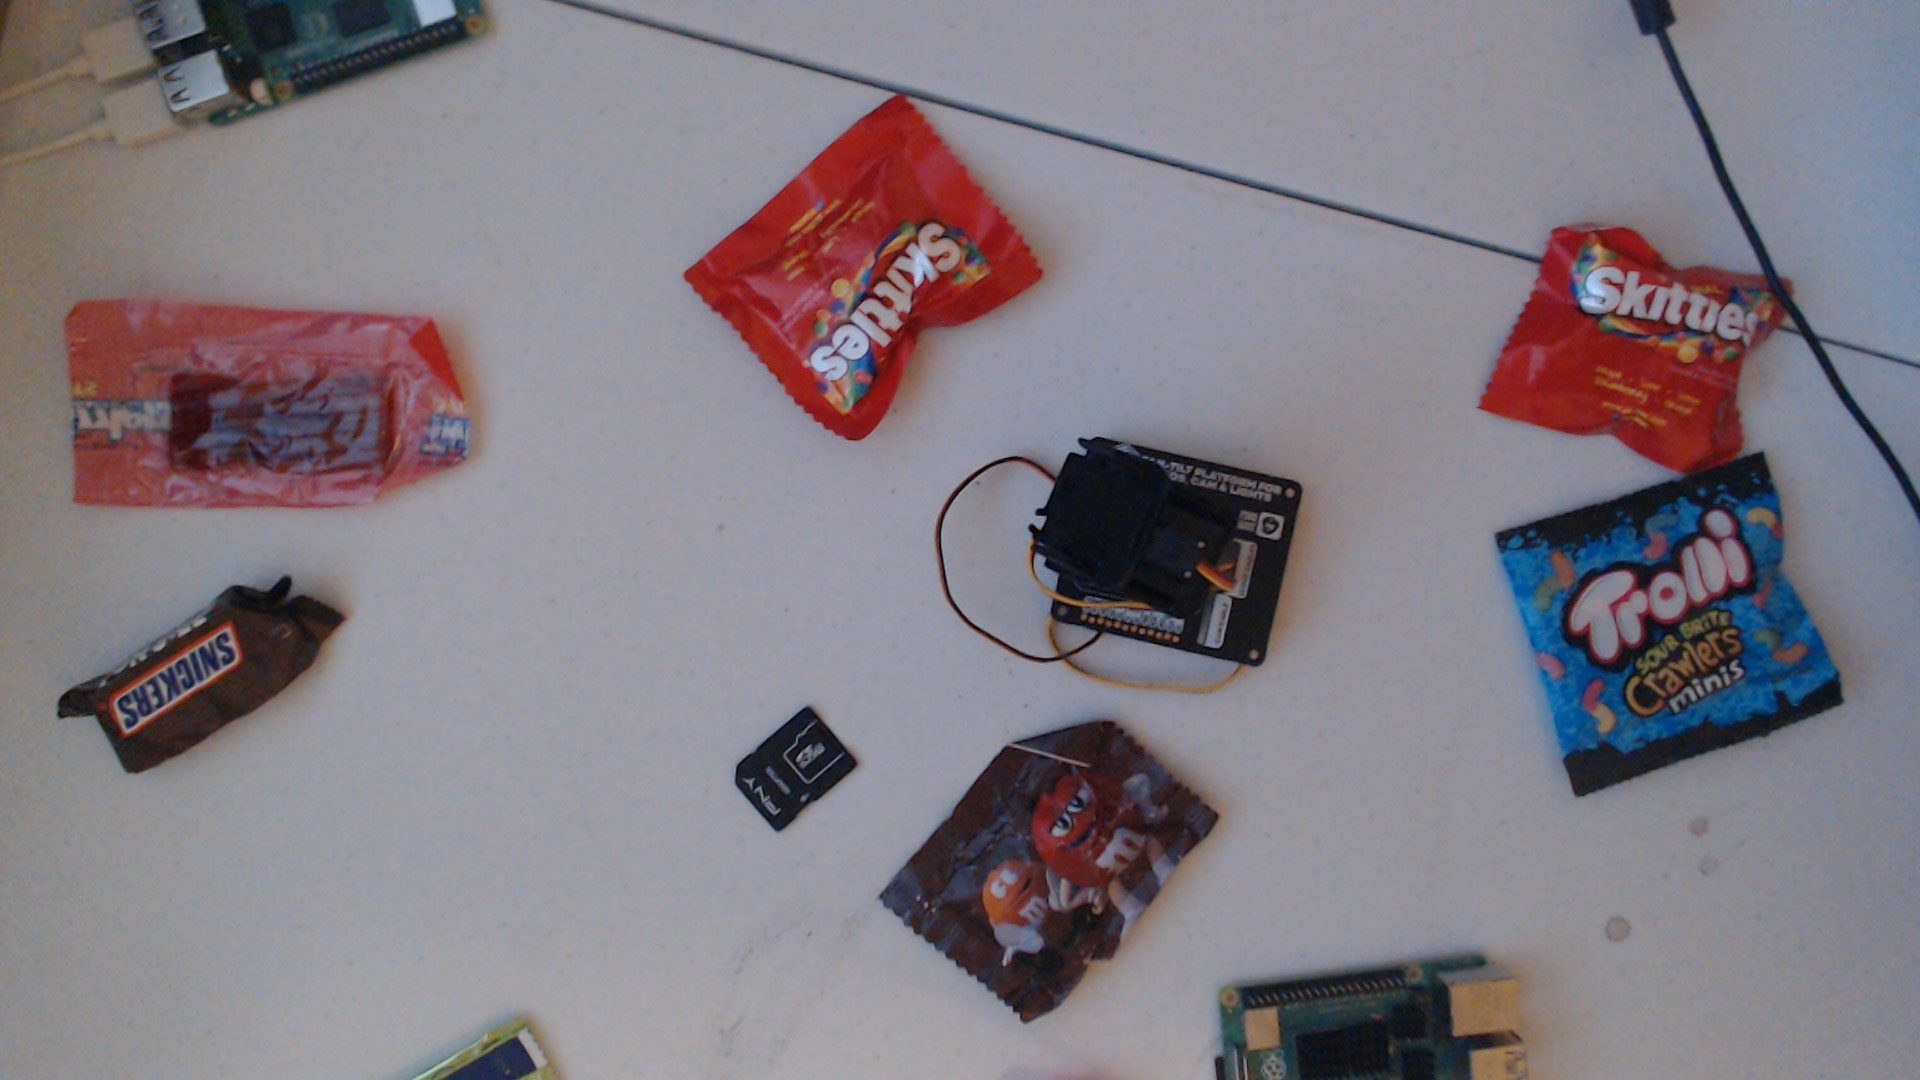

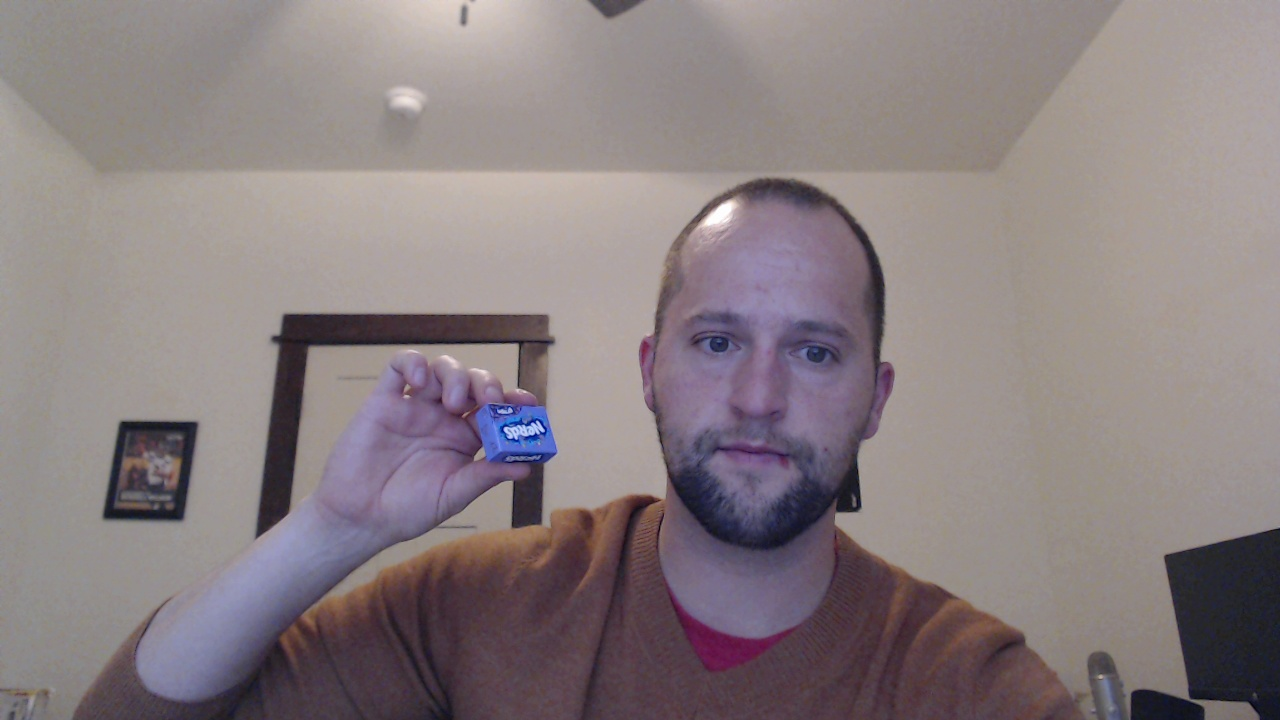

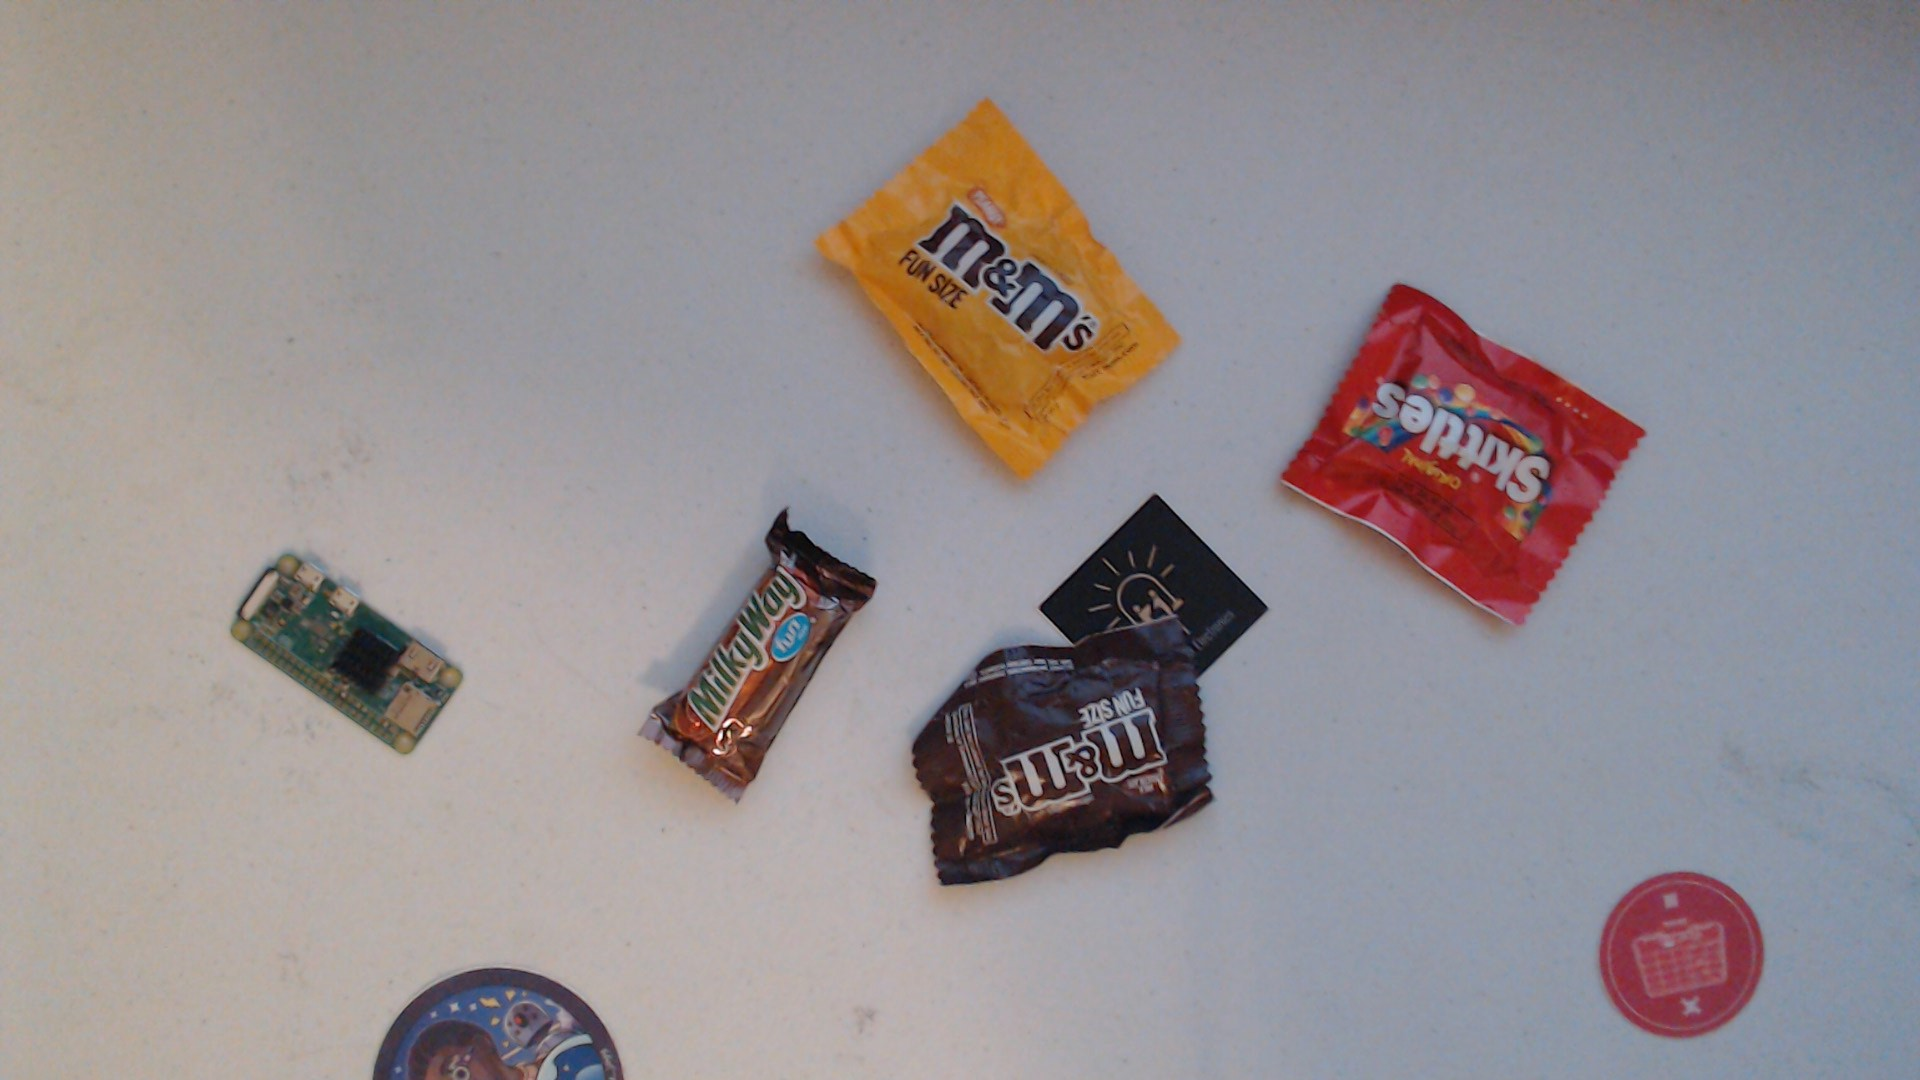

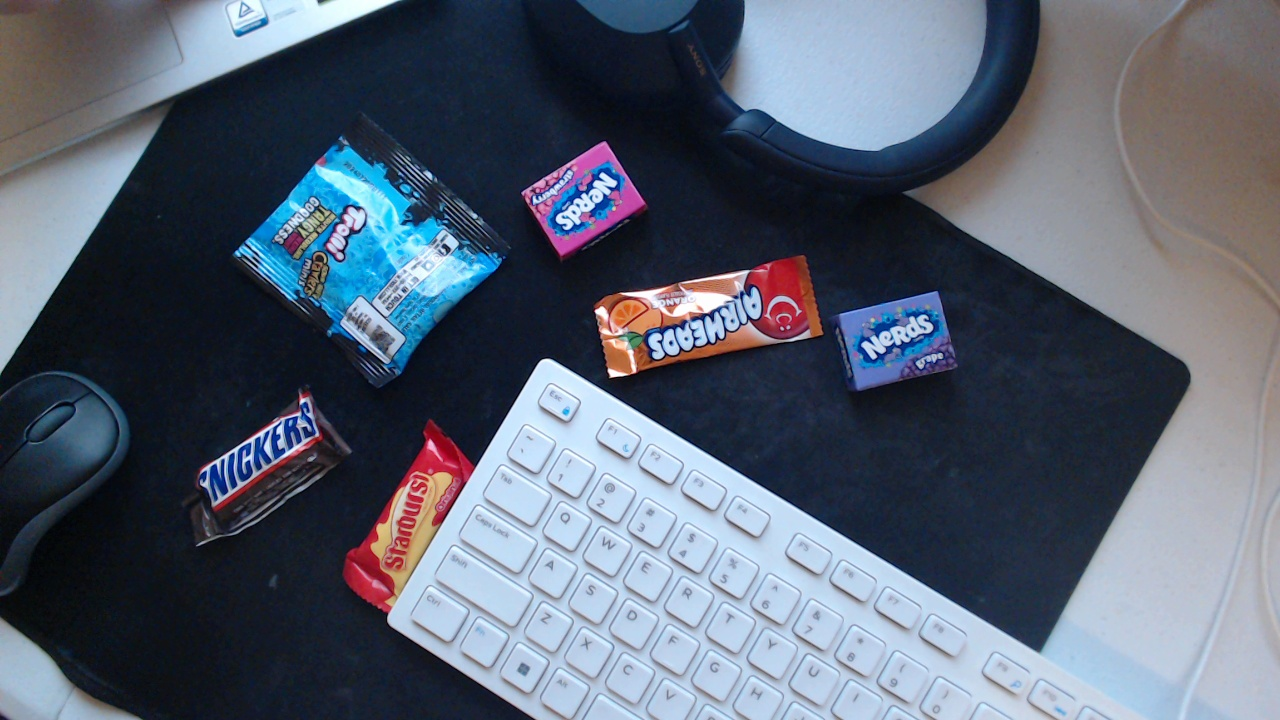

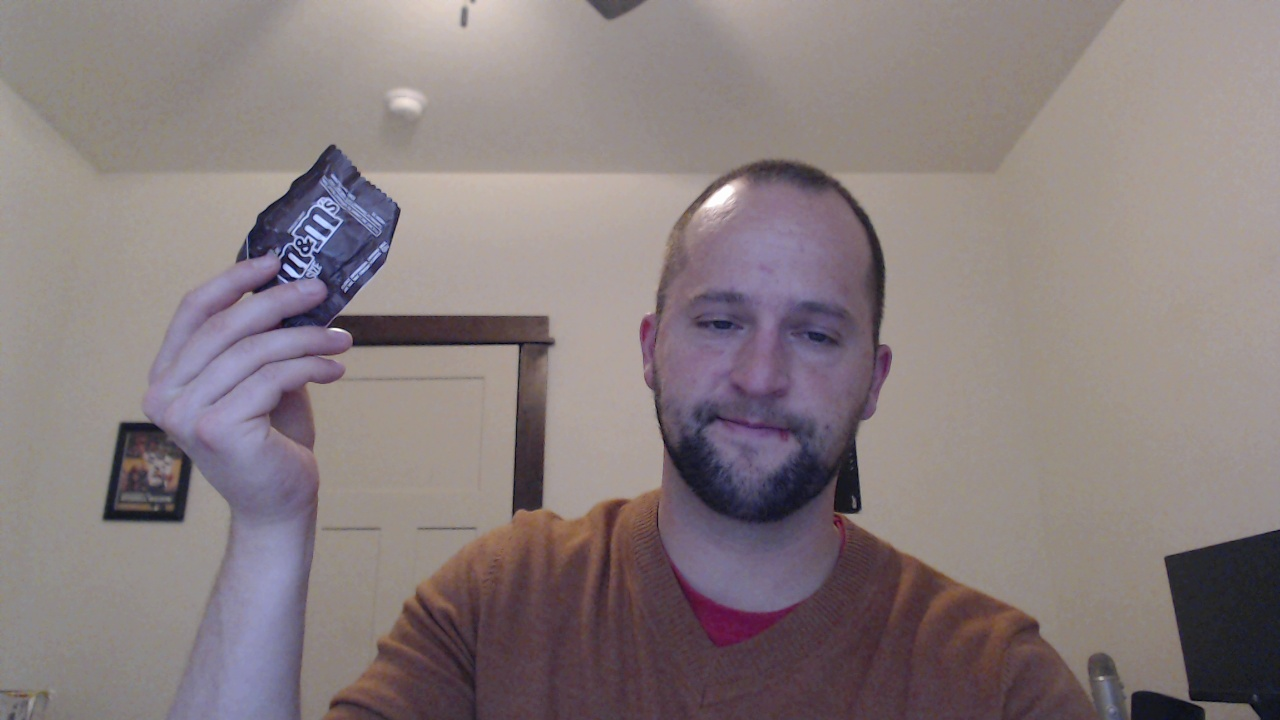

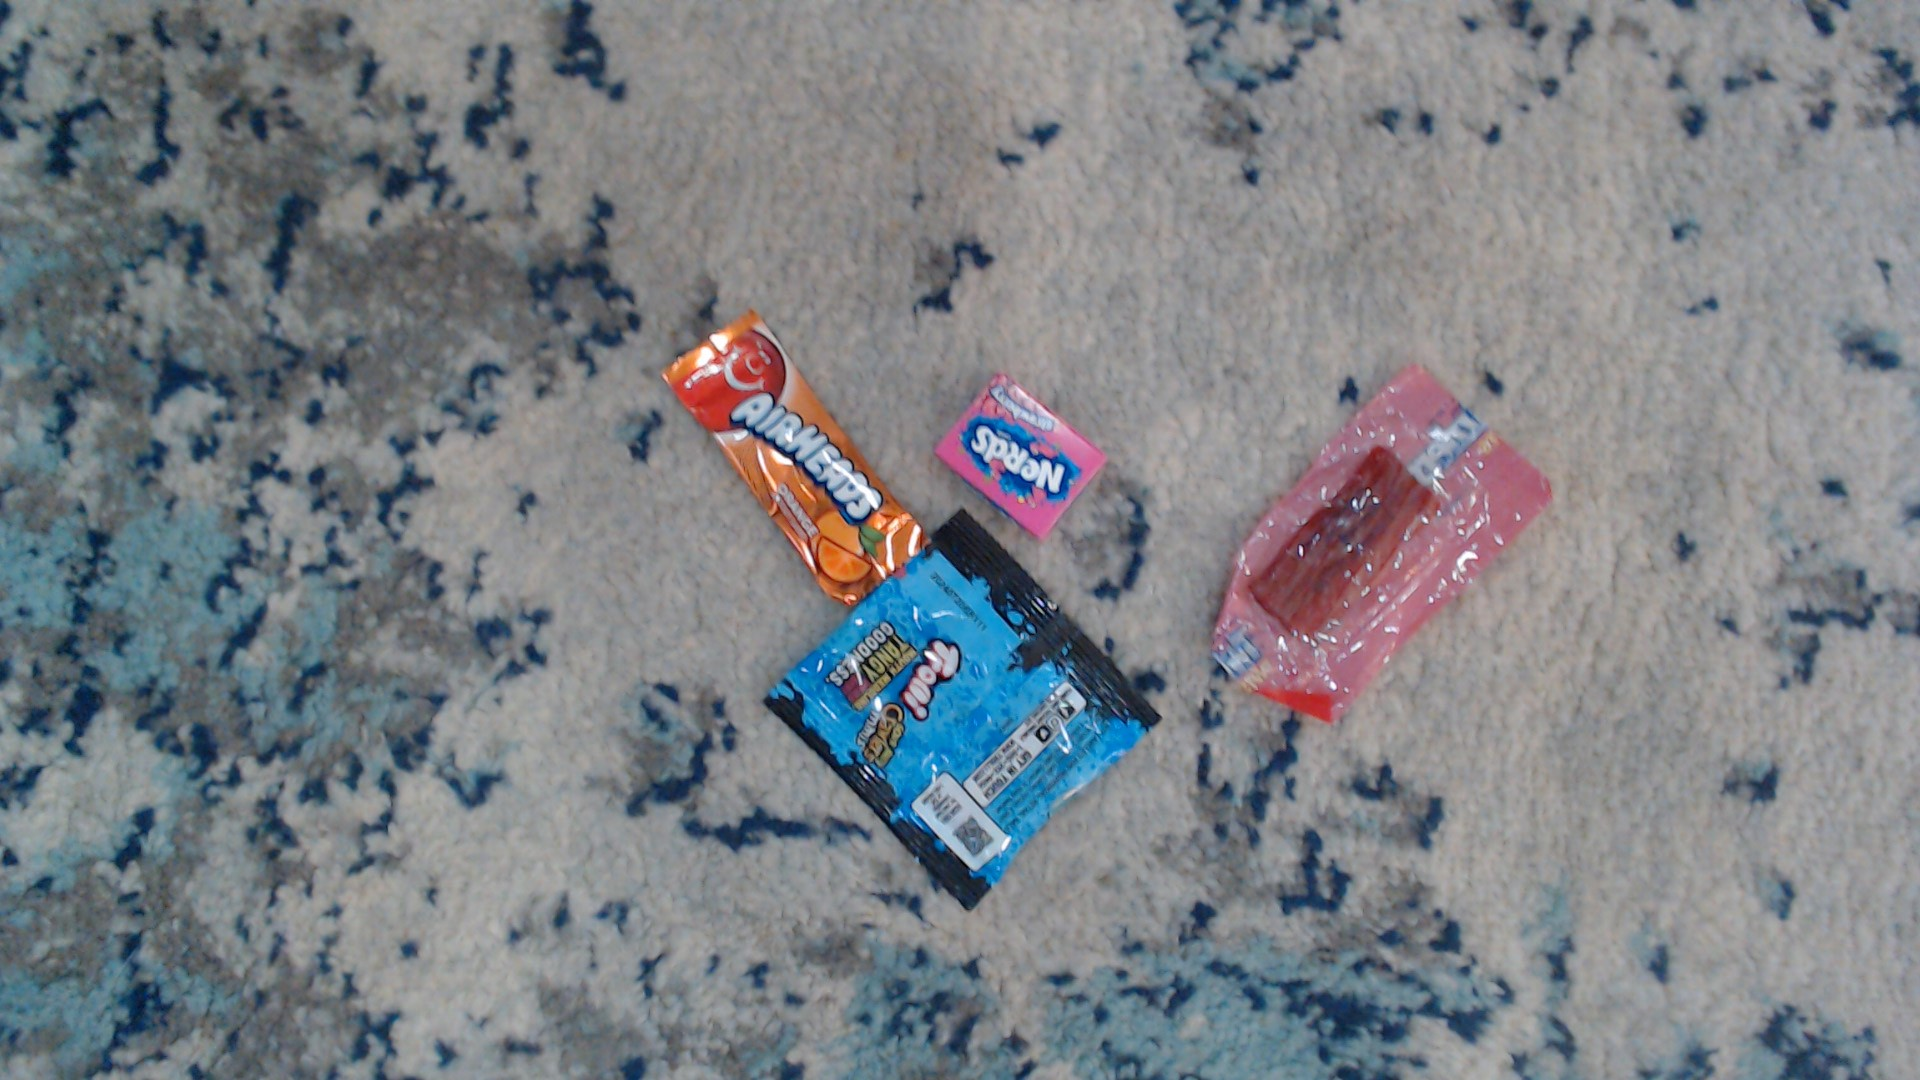

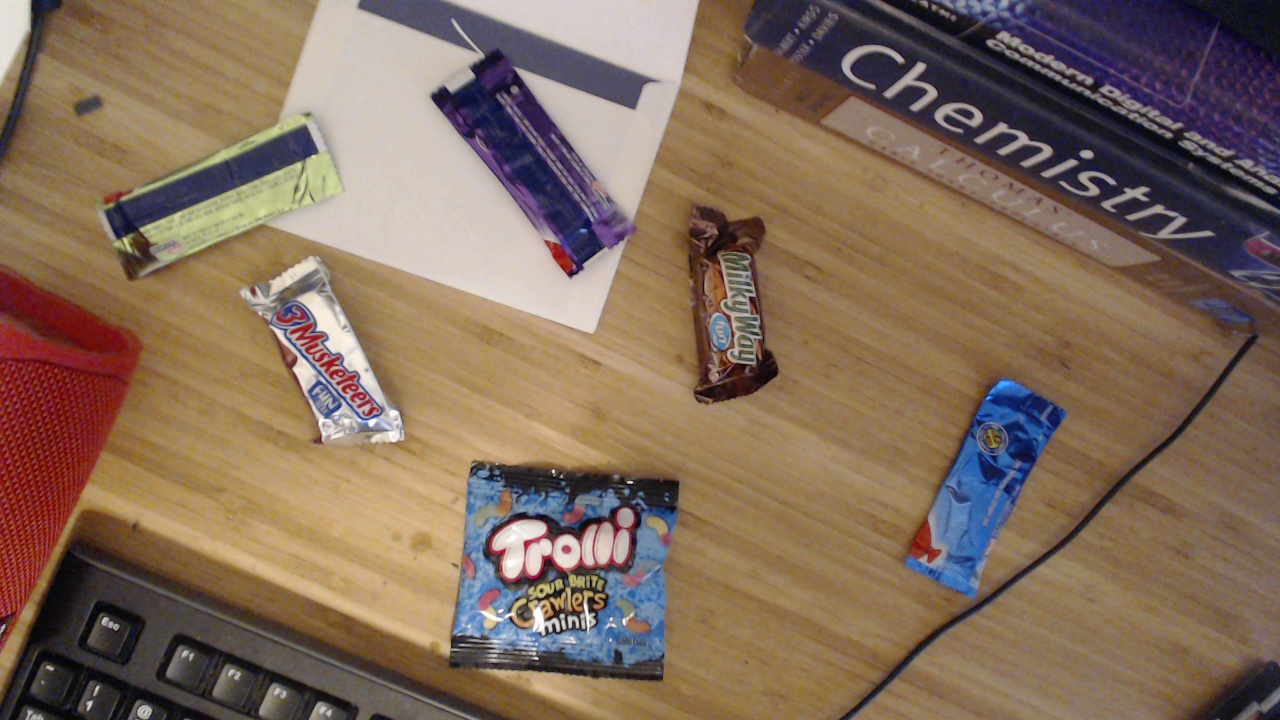

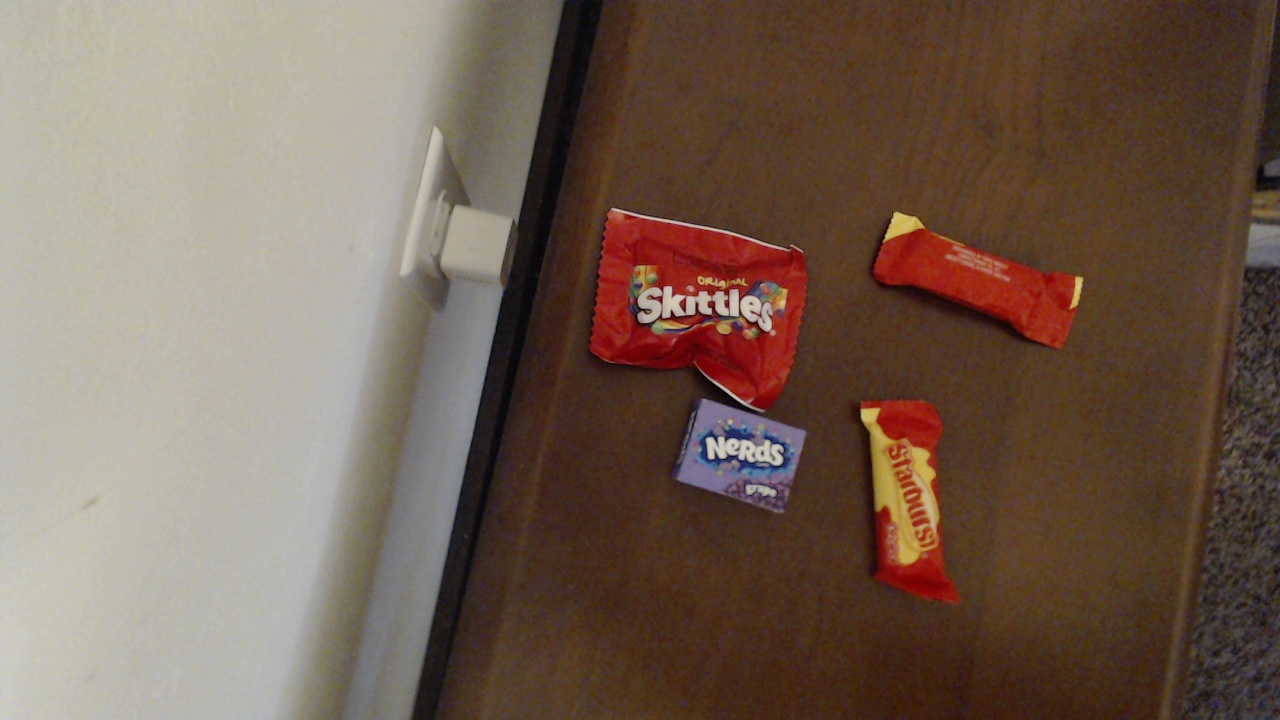

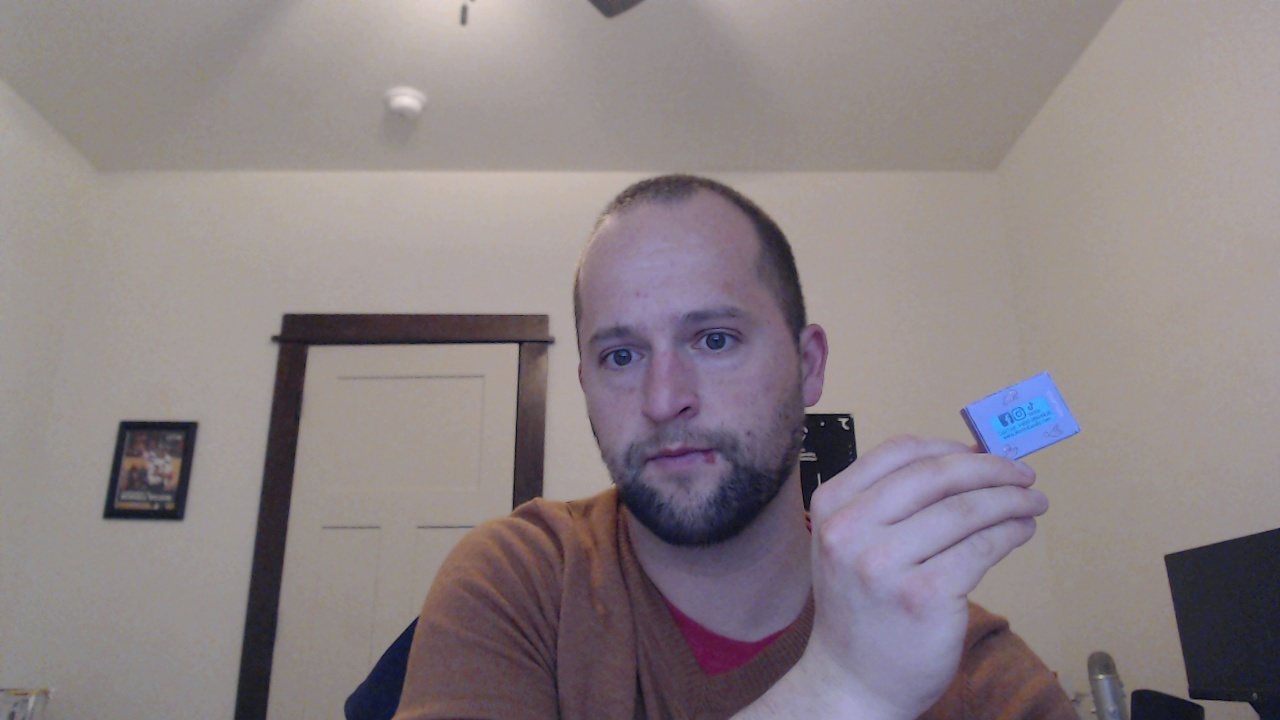

In [ ]:
# testing images without yolo classification.
for image_path in glob.glob(f'/content/data/test_data/images/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


## **SIFT TO DETECT OBJECTS**


In [ ]:
!unzip -q /content/Template.zip -d /content/template

In [ ]:
import os
import glob
import cv2
import numpy as np

# 0) Paths
template_dir = '/content/template/Template'
scene_dir    = '/content/custom_data/images'
output_dir   = '/content/sift_detection'
os.makedirs(output_dir, exist_ok=True)

# 1) Initialize SIFT & Matcher
sift = cv2.SIFT_create()                           # Create the SIFT feature detector
bf   = cv2.BFMatcher()                             # Brute-force matcher for descriptor matching

# 2) Load & describe all templates
template_data = []
for class_name in os.listdir(template_dir):
    class_folder = os.path.join(template_dir, class_name)
    if not os.path.isdir(class_folder):
        continue

    for tpl_path in glob.glob(os.path.join(class_folder, '*.*')):
        gray = cv2.imread(tpl_path, cv2.IMREAD_GRAYSCALE)
        if gray is None:
            continue

        # Detect SIFT keypoints & compute descriptors
        kps, des = sift.detectAndCompute(gray, None)
        h, w     = gray.shape

        # Convert KeyPoint objects to plain coordinate array
        pts = np.array([kp.pt for kp in kps], dtype=np.float32).reshape(-1,2)
        template_data.append({
            'class': class_name,
            'des':    des,
            'pts':    pts,
            'shape': (h, w)
        })

# 3) Detection function
def detect_sift(scene_path, ratio_thresh=0.75, min_matches=10):
    # Read and prepare the scene image
    scene_color = cv2.imread(scene_path)
    scene_gray  = cv2.cvtColor(scene_color, cv2.COLOR_BGR2GRAY)
    kps_scene, des_scene = sift.detectAndCompute(scene_gray, None)  # Detect features in scene

    detections = []
    for tpl in template_data:
        # Match descriptors with Lowe's ratio test
        matches = bf.knnMatch(tpl['des'], des_scene, k=2)
        good = [m for m,n in matches if m.distance < ratio_thresh * n.distance]
        if len(good) < min_matches:
            continue

        # Build point arrays for homography
        src_pts = np.float32([ tpl['pts'][m.queryIdx]    for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kps_scene[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        if M is None:
            continue

        # Project the template corners into the scene
        h, w = tpl['shape']
        corners = np.float32([[0,0],[0,h],[w,h],[w,0]]).reshape(-1,1,2)
        scene_corners = cv2.perspectiveTransform(corners, M)

        # Draw the detection box on a copy of the scene image
        out_img = cv2.polylines(
            scene_color.copy(),
            [np.int32(scene_corners)],
            True,
            (0,255,0), 2
        )
        detections.append((tpl['class'], out_img))
    return detections

# 4) Run detection on all scenes & save results
for scene_path in glob.glob(os.path.join(scene_dir, '*.*')):
    base       = os.path.splitext(os.path.basename(scene_path))[0]
    detections = detect_sift(scene_path)

    if not detections:
        print(f'No detections in {base}')
        continue

    # Save each detection with a filename indicating the class
    for class_name, img_out in detections:
        out_name = f'sift_{base}__{class_name}.jpg'
        cv2.imwrite(os.path.join(output_dir, out_name), img_out)

print("Done! Check your results in:", output_dir)


No detections in 6580d01b-candy_116
No detections in 73a058b9-candy_143
No detections in eb409806-candy_133
Done! Check your results in: /content/sift_detection


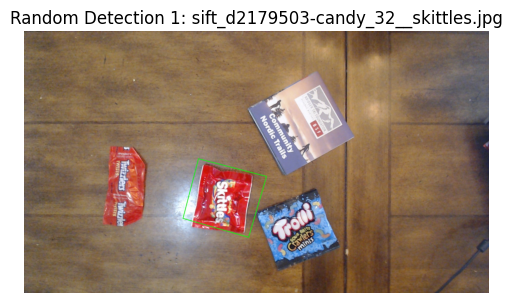

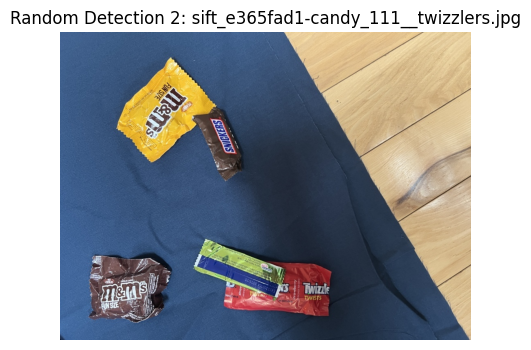

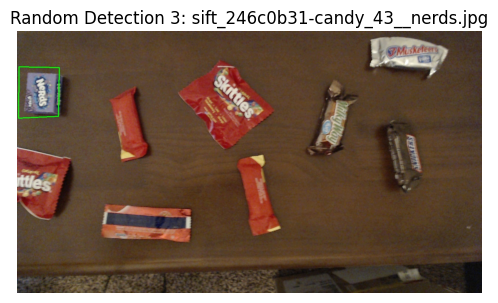

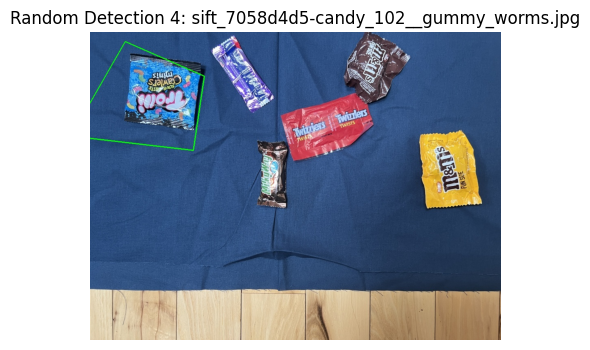

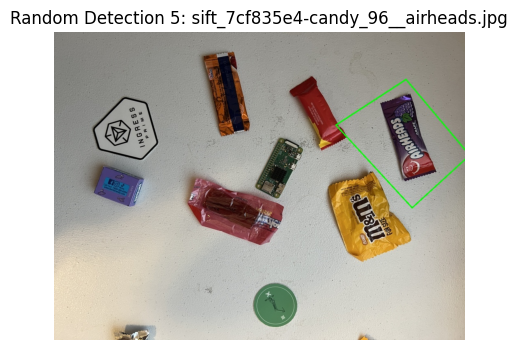

In [ ]:
import glob
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

# 1) Gather all output image paths
output_dir = '/content/sift_detection'
all_images = glob.glob(os.path.join(output_dir, '*.*'))

# 2) Pick 5 random images (or fewer if less available)
num_to_show = min(5, len(all_images))
sample_images = random.sample(all_images, k=num_to_show)

# 3) Loop and display each one
for idx, img_path in enumerate(sample_images, start=1):
    img = Image.open(img_path)
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Random Detection {idx}: {os.path.basename(img_path)}")
    plt.show()
